In [2]:
from skimage import io
from skimage import exposure
from skimage import filters
from skimage import util
import matplotlib.pyplot as plt
import numpy as np
from math import sqrt

# Projet

K_means

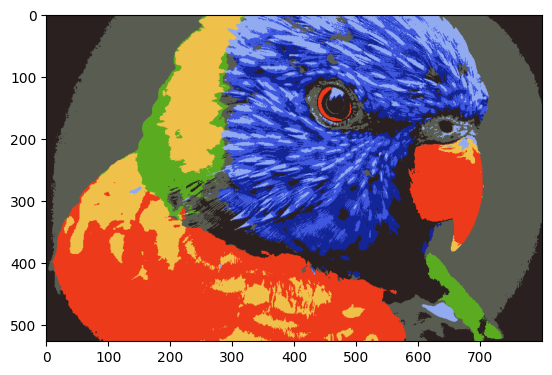

In [7]:

PetiteBete = io.imread('Image/perr.jpg')
PetiteBete = util.img_as_float(PetiteBete)

def k_means(image, nb_clusters):
    # Dimensions de l'image
    height, width, channels = image.shape
    
    # Appliquer le K-means
    pixels_flat = image.reshape((height * width, channels))
    centres = pixels_flat[np.random.choice(pixels_flat.shape[0], nb_clusters, replace=False)]
    
    # Nombre maximum d'itérations
    max_iterations = 100
    
    for _ in range(max_iterations):
        # Calculer la distance entre chaque pixel et chaque centroïde
        distances = np.array([[np.linalg.norm(pixel - centroid) for centroid in centres] for pixel in pixels_flat])
        
        # Assigner chaque pixel au cluster du centroïde le plus proche
        labels = np.argmin(distances, axis=1)
        
        # Mettre à jour les centroïdes en calculant la moyenne des pixels de chaque cluster
        for i in range(nb_clusters):
            centres[i] = np.mean(pixels_flat[labels == i], axis=0)
    
    # Remplacer chaque pixel par la valeur du centroïde correspondant
    for i in range(nb_clusters):
        pixels_flat[labels == i] = centres[i]
    
    # Remettre les pixels dans la forme originale
    clustered_pixels = pixels_flat.reshape((height, width, channels))
    
    return clustered_pixels

plt.imshow(k_means(PetiteBete, 8),cmap='gray')
plt.show()


In [8]:
test = io.imread('Image/PetiteBete.pgm')
test = util.img_as_float(test)

plt.imshow(k_means(test, 8),cmap='gray')
plt.show()

ValueError: not enough values to unpack (expected 3, got 2)